# Neural network from scratch

# 1. Importation des modules

In [670]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

# 2. Création des données

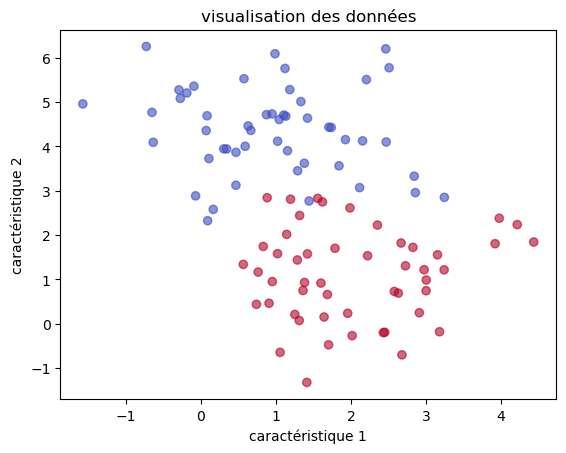

In [671]:
X, y = make_blobs (100, 2, centers = 2, random_state = 0)
y = y.reshape (100, 1)

plt.scatter (X[:, 0], X[:, 1], c = y, alpha = 0.6, cmap = "coolwarm")
plt.title ("visualisation des données")
plt.xlabel ("caractéristique 1")
plt.ylabel ("caractéristique 2")
plt.show ()

## 3. Création du réseau de neurone

In [672]:
def sigmoid (x):
    return 1/ (1+exp (-x))

def layer (X, W, b):
    return sigmoid (dot (X, W) + b)

def lossf (output, y):
    return -1/len (y) * (sum (y * log (output) + (1-y) * log (1- output)))

def accuracyf (prediction, y):
    return ((sum (prediction==y))/len (y))*100

def start (X):
    W = randn (X.shape [1], 1)
    b = randn (1)
    W[0], W[1], b = -1, -1, 1
    return W, b

def gradient (X, y, output):
    dw = 1/len (y) * dot (X.T, output-y)
    db = 1/len (y) * sum (output-y)
    return dw, db

def propagation (W, b, dw, db, lr):
    W = W - lr * dw
    b = b - lr*db
    return W, b

def neural (X, y, lr = 0.01, epochs = 500):
    W, b = start (X)
    l = []
    accuracy = []
    for k in range (epochs):
        output = layer (X, W, b)
        loss = lossf (output, y)
        dw, db = gradient (X, y, output)
        W, b = propagation (W, b, dw, db, lr)
        l.append (loss)
        accuracy.append (accuracyf (floor (output + 0.5), y))
    return l, accuracy, W, b

def predict (X, y):
    W, b = neural (X, y)[2], neural (X, y)[3]
    output = layer (X, W, b)
    prediction = floor (output + 0.5)
    return prediction

## 4. Entrainnement du réseau

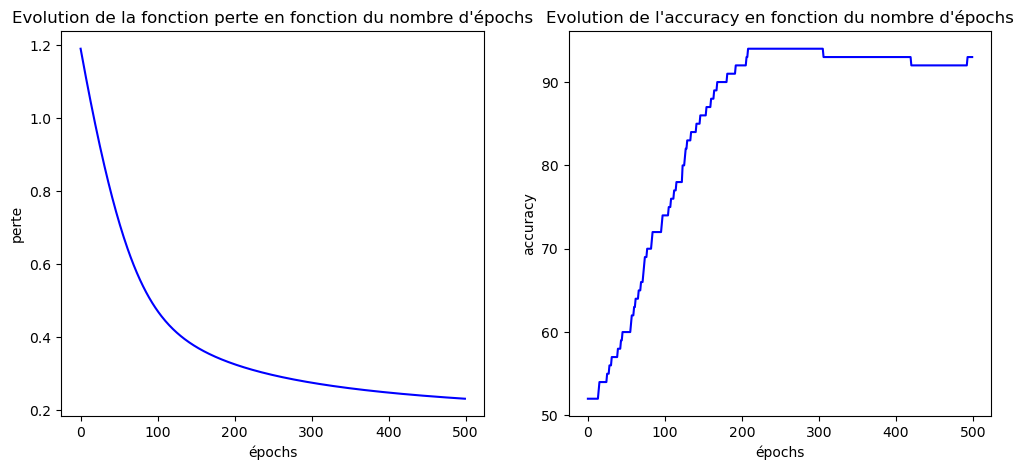

 On arrive à une perte de 0.23099729537347402
 On arrive à une accuracy de 93%


In [673]:
l, accuracy, W, b = neural (X, y)

fig, axs = plt.subplots (1, 2, figsize = (12, 5))

axs[0].plot (range (500), l, 'b')
axs[0].set_title ("Evolution de la fonction perte en fonction du nombre d'épochs")
axs[0].set_xlabel ("épochs")
axs[0].set_ylabel ("perte")

axs[1].plot (range (500), accuracy, 'b')
axs[1].set_title ("Evolution de l'accuracy en fonction du nombre d'épochs")
axs[1].set_xlabel ("épochs")
axs[1].set_ylabel ("accuracy")
plt.show ()

print (f" On arrive à une perte de {l[-1]}")
print (f" On arrive à une accuracy de {int (accuracy[-1])}%")

## 5. Validation du modèle

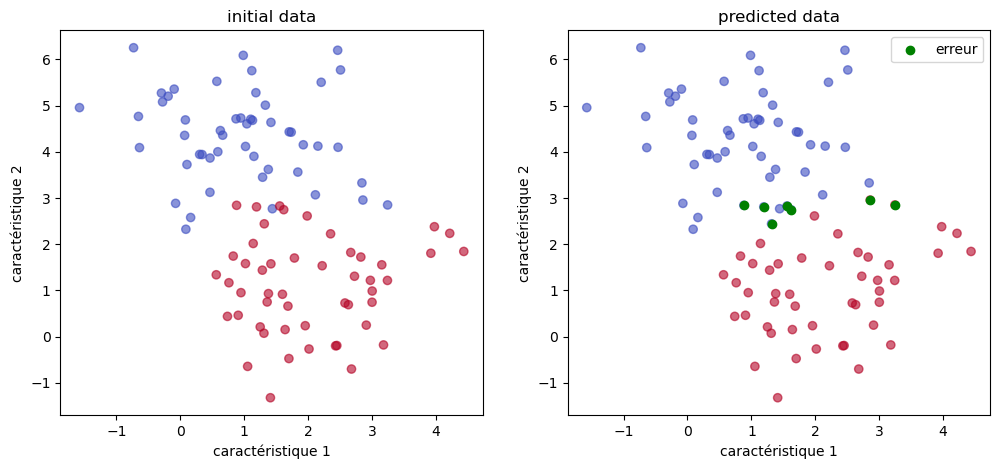

In [674]:
Xtest, ytest = make_blobs (100, 2, centers = 2, random_state = 0)
ytest = ytest.reshape (100, 1)

ypred = predict (Xtest, ytest)
a = Xtest[(ypred!=ytest).reshape (100)]

fig, axs = plt.subplots (1, 2, figsize = (12, 5))

axs[0].scatter (Xtest[:, 0], Xtest[:, 1], c = ytest, alpha = 0.6, cmap = "coolwarm")
axs[0].set_title ("initial data")
axs[0].set_xlabel ("caractéristique 1")
axs[0].set_ylabel ("caractéristique 2")


axs[1].scatter (Xtest[:, 0], Xtest[:, 1], c = ypred, alpha = 0.6, cmap = "coolwarm")
axs[1].scatter (a[:, 0], a[:, 1], c = "green", label = "erreur")
axs[1].set_title ("predicted data")
axs[1].set_xlabel ("caractéristique 1")
axs[1].set_ylabel ("caractéristique 2")
plt.legend ()
plt.show ()